# Loan Application Status Prediction
## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

## Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Read Dataset

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Dataset has 614 rows and 13 columns

### Exploratory Data Analysis

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Comment :
- In loan application status dataset we have 614 rows with 13 columns including target variable.
- A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
- Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
- There are three types of datatype dtypes: float64(4), int64(1), object(8)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

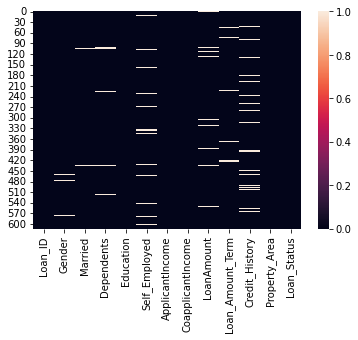

In [6]:
sns.heatmap(df.isnull());

In [7]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


#### Comment :
- 7 out 13 columns contains missing value.
- As small amount of data is missing so we use mean amd mode to replace with NaN values.

In [8]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

df['LoanAmount']=imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))


imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')

df['Gender']=imputer.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imputer.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imputer.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
for i in df.columns:
    print(f'_______________{i}_________________\n')
    print(df[i].value_counts())
    print('------------------------------------\n')

_______________Loan_ID_________________

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
------------------------------------

_______________Gender_________________

Male      502
Female    112
Name: Gender, dtype: int64
------------------------------------

_______________Married_________________

Yes    401
No     213
Name: Married, dtype: int64
------------------------------------

_______________Dependents_________________

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
------------------------------------

_______________Education_________________

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------------------------------

_______________Self_Employed_________________

No     532
Yes     82
Name: Self_Employed, dtype: int64
------------------------------------

_______________Appl

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

### Checking the 'categorical' and 'numerical columns'

In [12]:
cat_col = []
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        cat_col.append(i)
    elif df.dtypes[i] != 'object':
        num_col.append(i)

In [13]:
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Data Visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


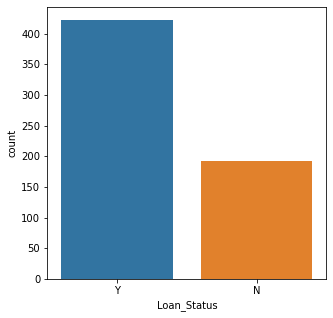

In [15]:
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['Loan_Status']);

Here we can clearly see that the target is imbalanced and we will have to balance it

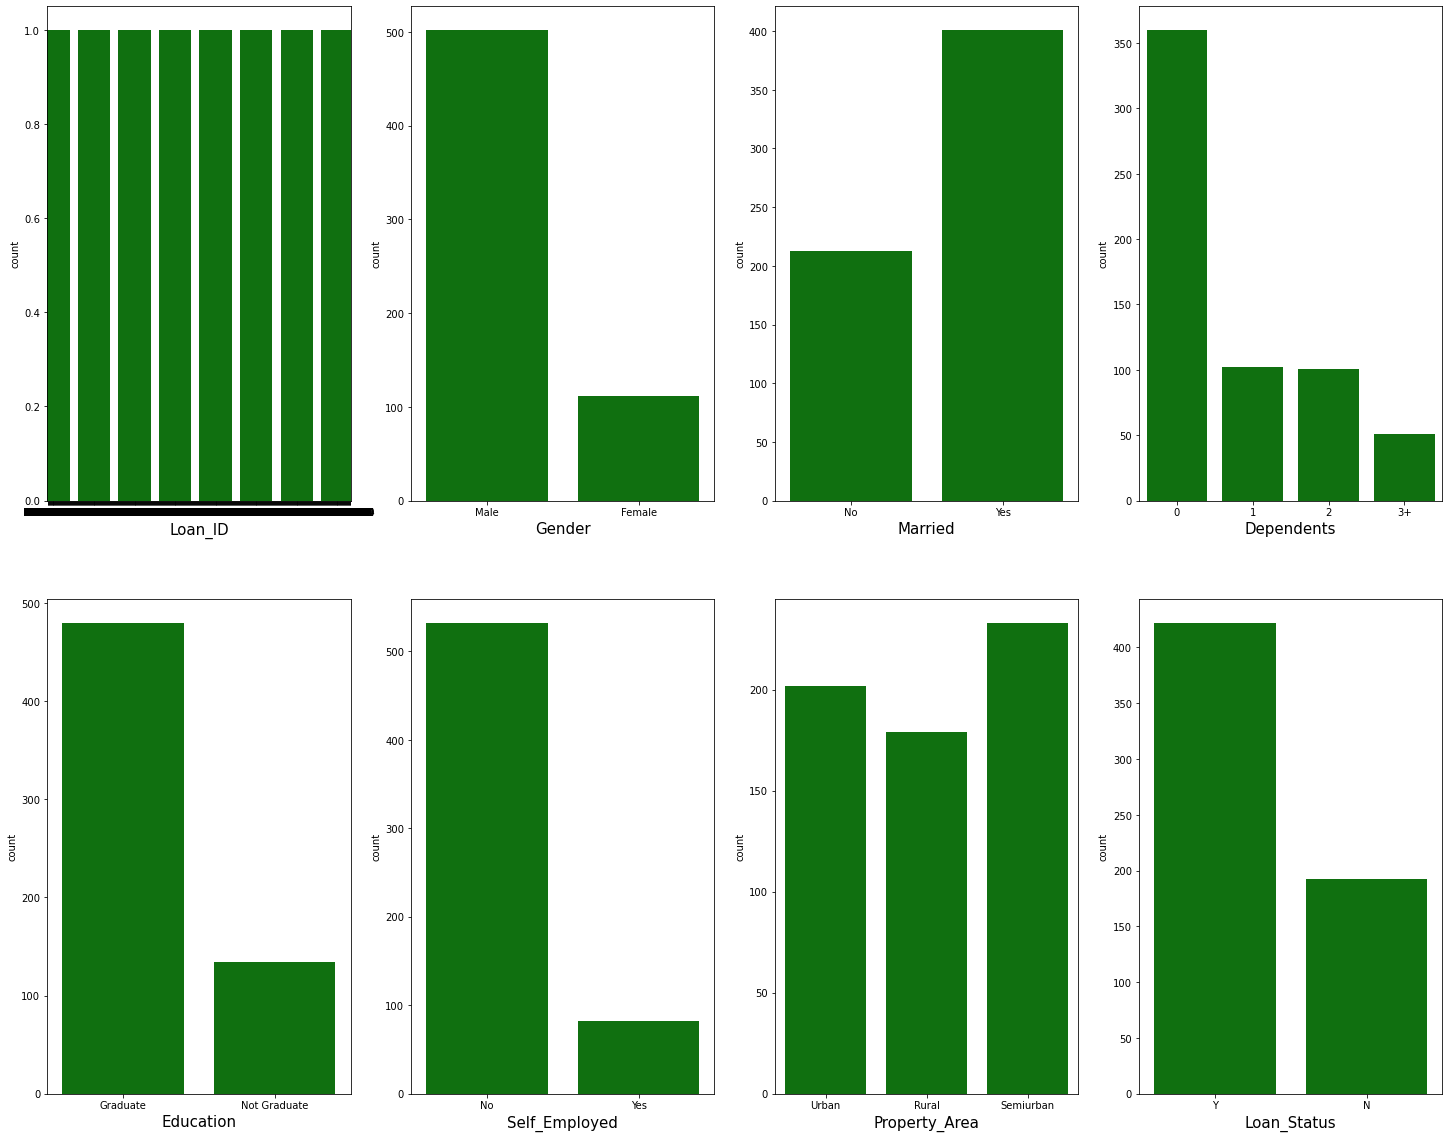

In [22]:
plt.figure(figsize=(25,20))
plotnumber = 1
for column in cat_col:
    if plotnumber<=len(cat_col):
        ax=plt.subplot(2,4,plotnumber)
        sns.countplot(df[column], color='green')
        plt.xlabel(column, fontsize=15)
    plotnumber+=1;

In [34]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [35]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [36]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

### Outliers Identifying

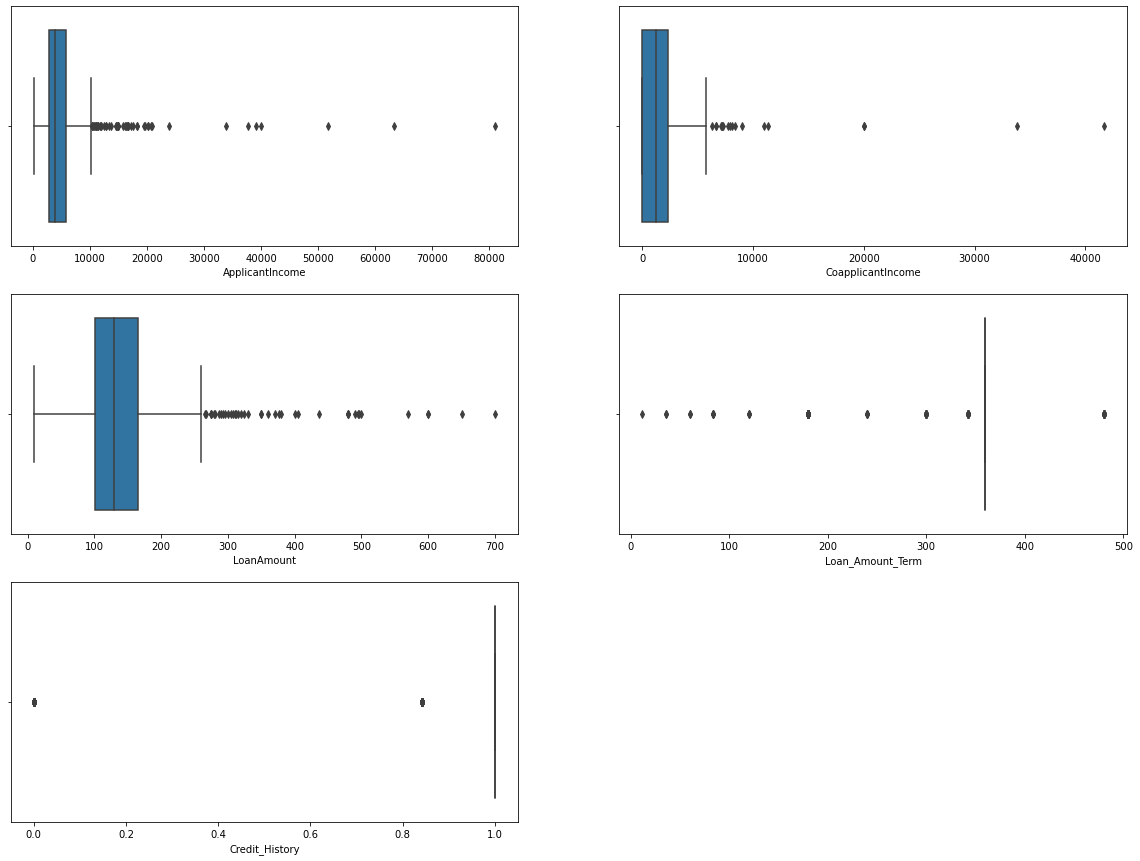

In [37]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1
for column in num_col:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1;

In [31]:
import scipy as stats
from scipy.stats import zscore

features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [32]:
new_df = df[(z<3).all(axis=1)]
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Checking the skewness of the dataset

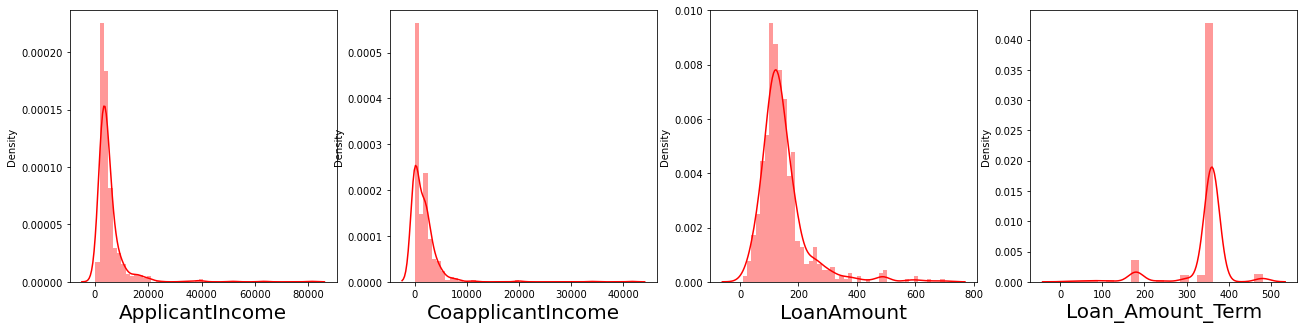

In [38]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in num_col:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [40]:
df.skew()

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [41]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,0.235387
1,0.170974,0.750578,-0.037659
2,-0.499955,-1.102837,-1.346305
3,-0.743873,0.891686,-0.167886
4,0.582817,-1.102837,0.158610


### Checking skewness after using yeo-johnson ethod

In [43]:
df.skew()

Dependents           1.015551
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [44]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.111770,-0.002021,0.158535,-0.101054,-0.037392
ApplicantIncome,0.111770,1.000000,-0.367287,0.484375,-0.029695,0.018448
CoapplicantIncome,-0.002021,-0.367287,1.000000,0.134138,0.011327,0.001282
LoanAmount,0.158535,0.484375,0.134138,1.000000,0.082697,-0.023370
Loan_Amount_Term,-0.101054,-0.029695,0.011327,0.082697,1.000000,0.001395
Credit_History,-0.037392,0.018448,0.001282,-0.023370,0.001395,1.000000


In [47]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      502
Female    112
Name: Gender, dtype: int64
Married
Yes    401
No     213
Name: Married, dtype: int64
Dependents
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


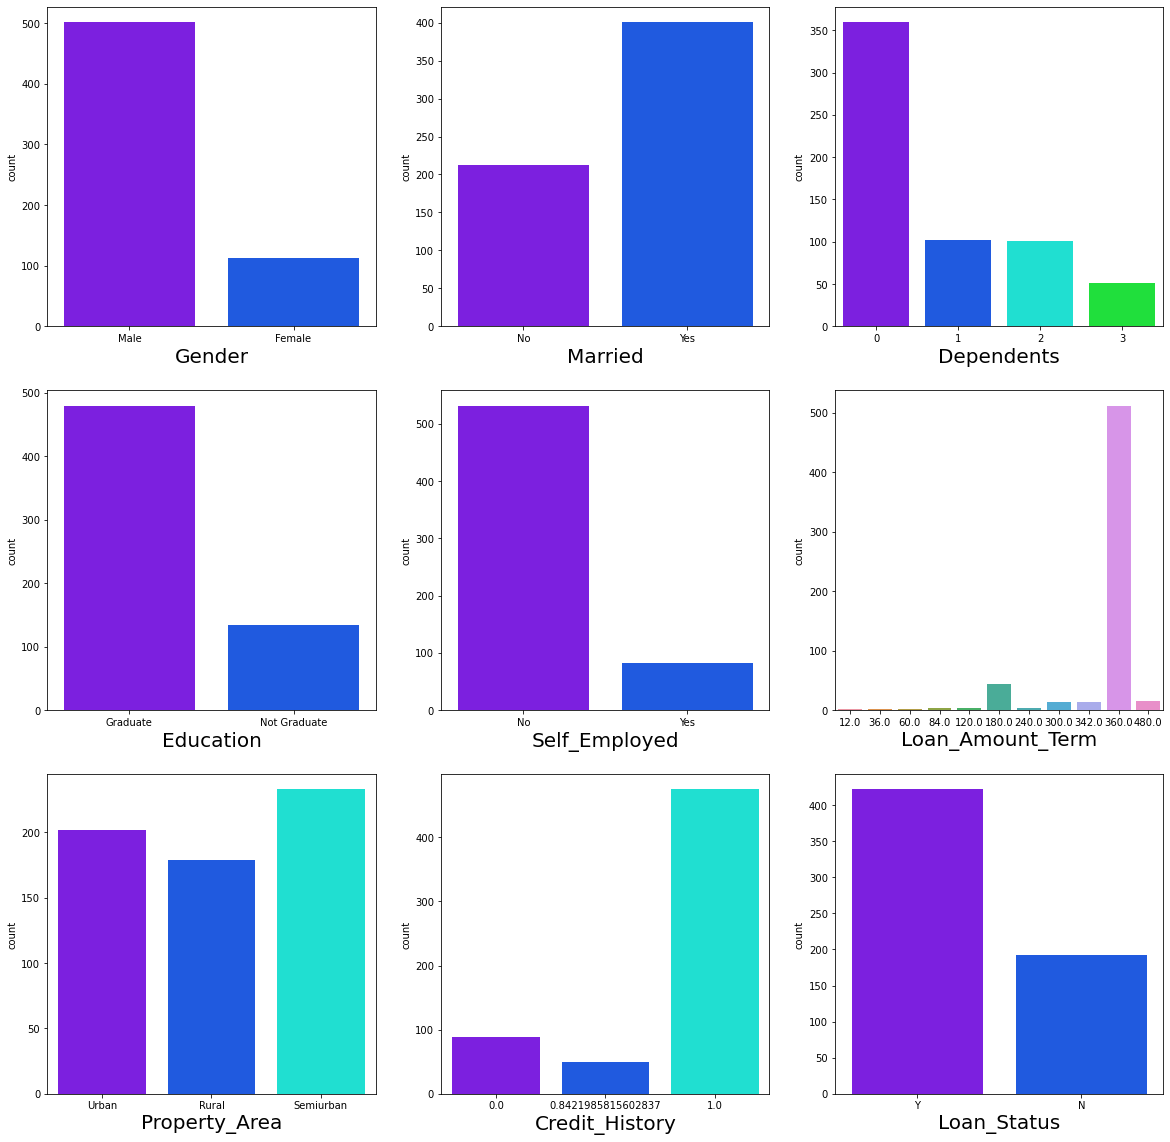

In [48]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1;

#### Observation:
Here we observe that more applicant are males. Maximum number of candidates are married. Here 350 candidates have no dependent. That means most of the applicants have no dependents. Approx 480 candidates are graduates. Maximum of the candidates are not self employed. Approx 410 candidates are approved for loan. However 190 people application are not approved for loan.

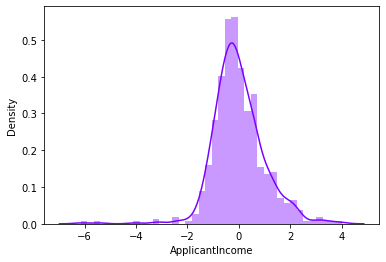

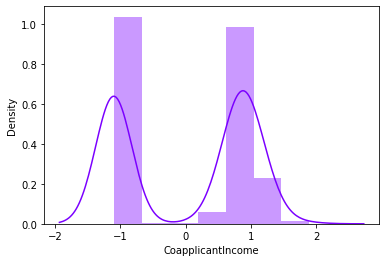

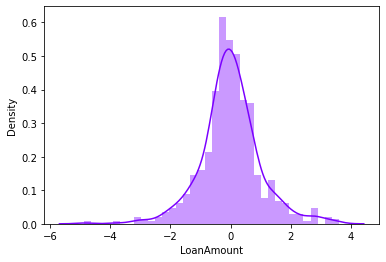

In [49]:
df1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in df1:
    sns.distplot(df[i])
    plt.show()

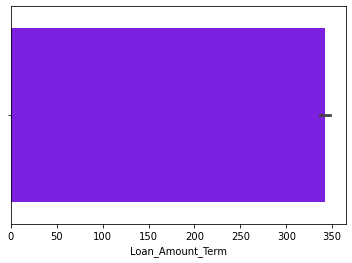

In [50]:
sns.barplot(df['Loan_Amount_Term'])
plt.show()

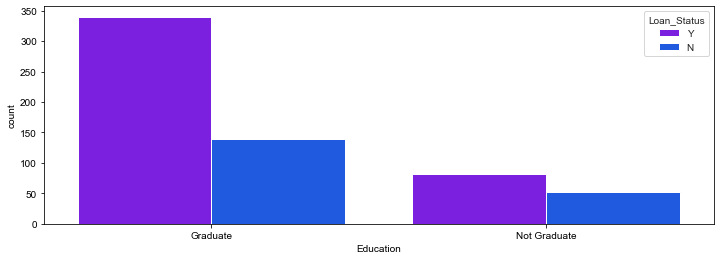

In [51]:
plt.subplots(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=df);

##### Observation:
Approx 61% application of graduates are approved. However 40% application of not graduates are approved. This shows that education plays important role in approving the loan.

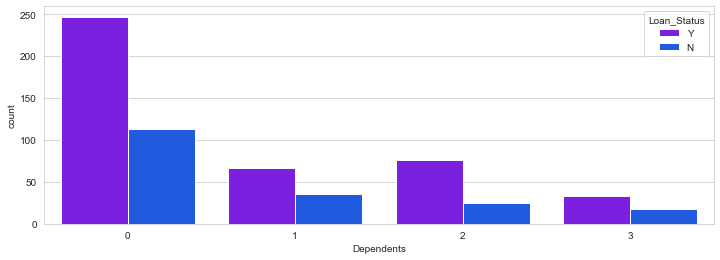

In [52]:
plt.subplots(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Loan_Status',data=df);

##### Observation:
Here we can see that approx equal number of applications are approved for applicant having no dependent or one dependent

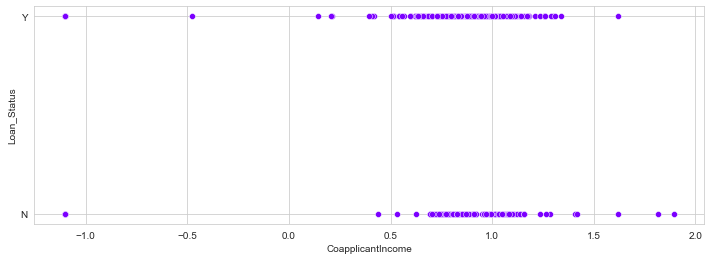

In [53]:
plt.subplots(figsize=(12,4))
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df);

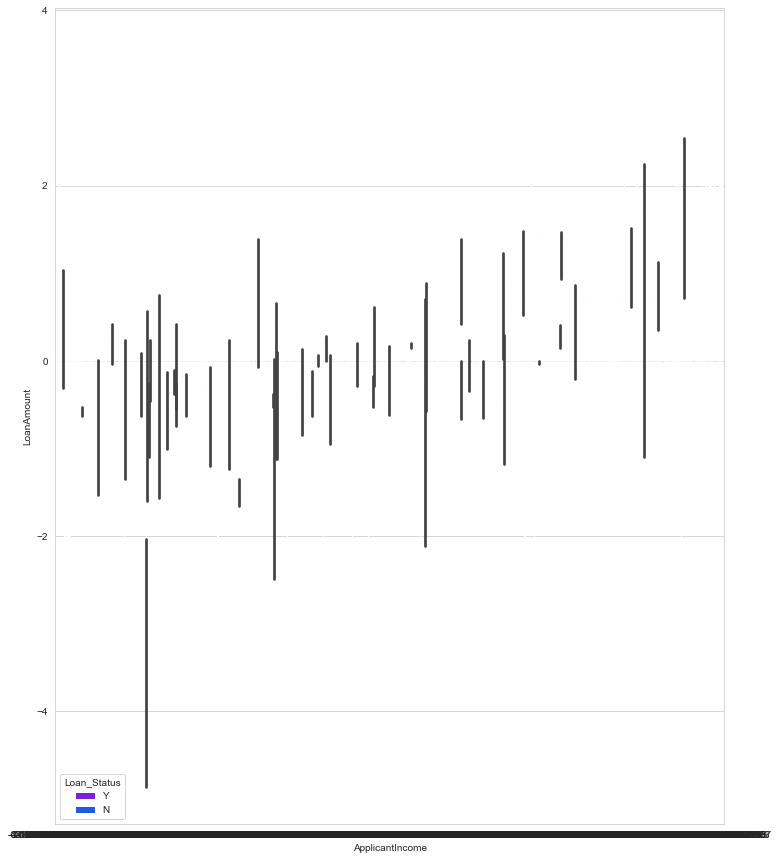

In [54]:
plt.subplots(figsize=(12,15))
sns.barplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status');

#### Observation: 
Here we can see that higher the applicant income higher the loan amount approval.

In [55]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.111770,-0.002021,0.158535,-0.101054,-0.037392
ApplicantIncome,0.111770,1.000000,-0.367287,0.484375,-0.029695,0.018448
CoapplicantIncome,-0.002021,-0.367287,1.000000,0.134138,0.011327,0.001282
LoanAmount,0.158535,0.484375,0.134138,1.000000,0.082697,-0.023370
Loan_Amount_Term,-0.101054,-0.029695,0.011327,0.082697,1.000000,0.001395
Credit_History,-0.037392,0.018448,0.001282,-0.023370,0.001395,1.000000


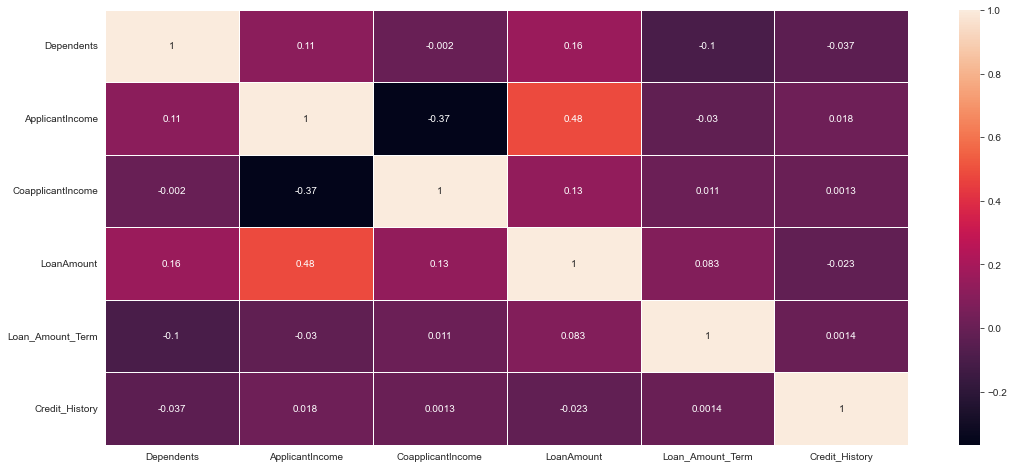

In [56]:
plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(),annot=True,linewidths=.5);

##### Observation: 
Here,we can see that Loan_Amount_Term is very less correlated with other columns. So we can drop it while training our model. Even credit History is very less correlated.

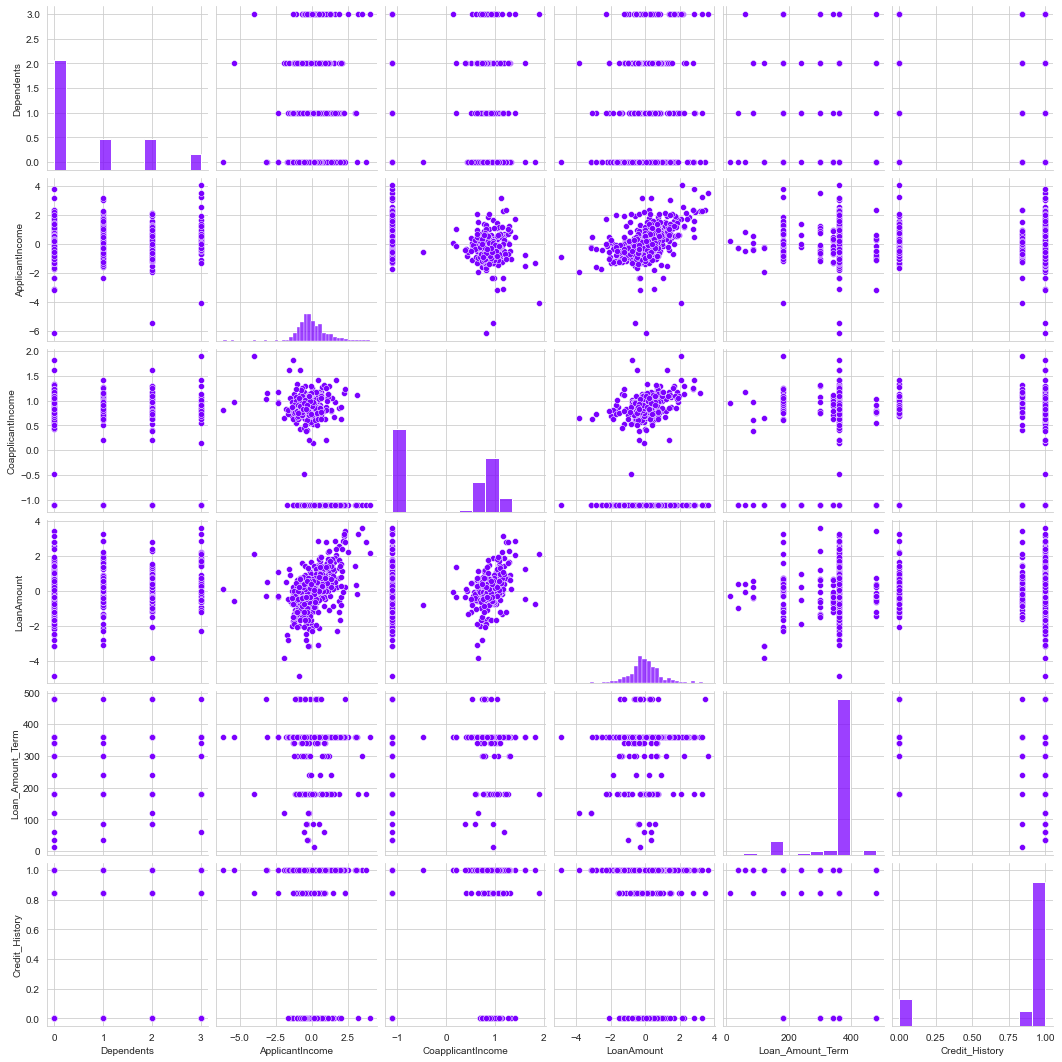

In [57]:
sns.pairplot(df);

In [59]:
from sklearn.preprocessing import LabelEncoder

df.drop(['Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,1.0,2,1
1,1,1,1,0,0,0.170974,0.750578,1.0,0,0
2,1,1,0,0,1,-0.499955,-1.102837,1.0,2,1
3,1,1,0,1,0,-0.743873,0.891686,1.0,2,1
4,1,0,0,0,0,0.582817,-1.102837,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.554885,-1.102837,1.0,0,1
610,1,1,3,0,0,-0.000290,-1.102837,1.0,0,1
611,1,1,1,0,0,1.023487,0.208603,1.0,2,1
612,1,1,2,0,0,0.931750,-1.102837,1.0,2,1


In [60]:
df['total_income']=df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,1.0,2,1,-0.558506
1,1,1,1,0,0,1.0,0,0,0.921552
2,1,1,0,0,1,1.0,2,1,-1.602792
3,1,1,0,1,0,1.0,2,1,0.147813
4,1,0,0,0,0,1.0,2,1,-0.520020
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,-1.657722
610,1,1,3,0,0,1.0,0,1,-1.103127
611,1,1,1,0,0,1.0,2,1,1.232090
612,1,1,2,0,0,1.0,2,1,-0.171087


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Married'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Self_Employed'),
  Text(0, 5.5, 'Credit_History'),
  Text(0, 6.5, 'Property_Area'),
  Text(0, 7.5, 'Loan_Status'),
  Text(0, 8.5, 'total_income')])

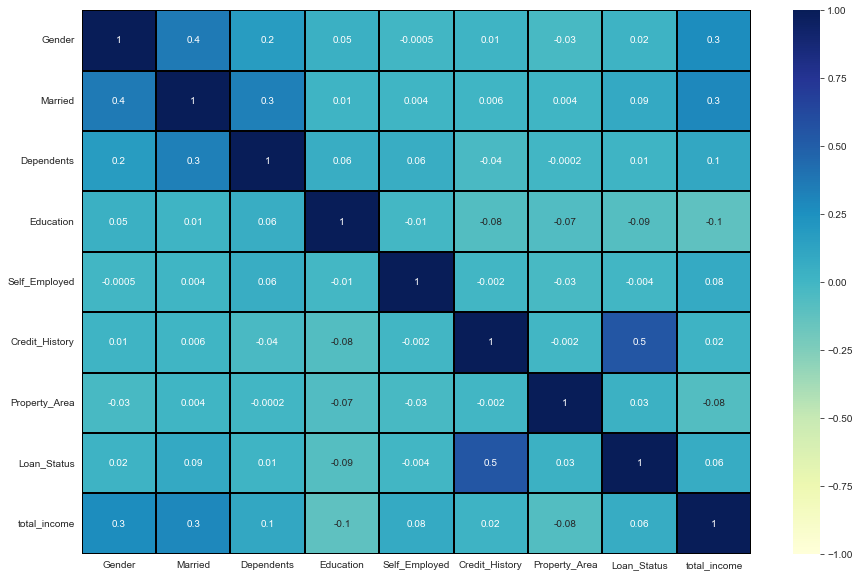

In [61]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0)

In [62]:
X=df.drop(columns=['Loan_Status'],axis=1)
Y=df['Loan_Status']

### Standard Scalarization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,total_income
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.451640,1.223298,-0.496489
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.451640,-1.318513,0.819222
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,0.451640,1.223298,-1.424816
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,0.451640,1.223298,0.131400
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.451640,1.223298,-0.462276
...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,0.451640,-1.318513,-1.473647
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.451640,-1.318513,-0.980635
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.451640,1.223298,1.095277
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.451640,1.223298,-0.152089


### Oversampling (SMOTE)

In [64]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [65]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

### Model

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.30, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(X_train,Y_train)
    predRFC=RFC.predict(X_test)
    acc=accuracy_score(Y_test,predRFC)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8385826771653543  on Random_state  45


### Creating Train_Test_Split

In [67]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=.3,random_state=maxRS)

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# [Prediction]
predLOR = LOR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR))

R2 Score: 0.019732337379395948
Mean Absolute Error 0.2440944881889764
Mean Squared Error 0.2440944881889764
Root Mean Squared Error 0.4940591950252281
-----------------------------------------------------
0.7559055118110236
-----------------------------------------------------
[[ 61  58]
 [  4 131]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.51      0.66       119
           1       0.69      0.97      0.81       135

    accuracy                           0.76       254
   macro avg       0.82      0.74      0.74       254
weighted avg       0.81      0.76      0.74       254



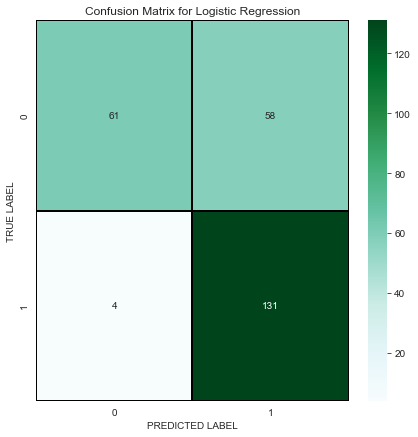

In [69]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Decission Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: 0.08297541238717687
Mean Absolute Error 0.2283464566929134
Mean Squared Error 0.2283464566929134
Root Mean Squared Error 0.4778561045889373
-----------------------------------------------------
Accuracy Score:  0.7716535433070866
-----------------------------------------------------
Confusion Matrix:
 [[ 96  23]
 [ 35 100]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       119
           1       0.81      0.74      0.78       135

    accuracy                           0.77       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.78      0.77      0.77       254



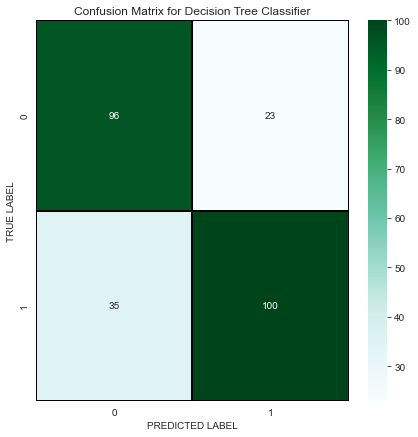

In [71]:
cm = confusion_matrix(Y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.32013694366635526
Mean Absolute Error 0.16929133858267717
Mean Squared Error 0.16929133858267717
Root Mean Squared Error 0.411450286890989
-----------------------------------------------------
Accuracy Score:  0.8307086614173228
-----------------------------------------------------
Confusion Matrix:
 [[101  18]
 [ 25 110]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       119
           1       0.86      0.81      0.84       135

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



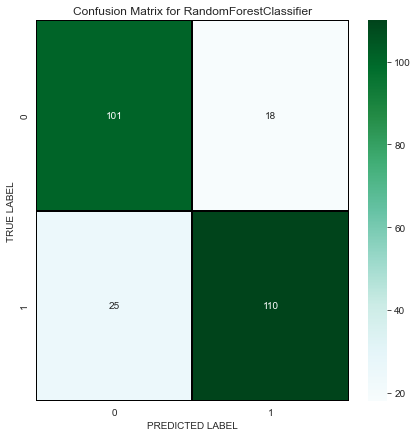

In [73]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: -0.027699968876439662
Mean Absolute Error 0.2559055118110236
Mean Squared Error 0.2559055118110236
Root Mean Squared Error 0.5058710426690024
-----------------------------------------------------
Accuracy Score:  0.7440944881889764
-----------------------------------------------------
Confusion Matrix:
 [[ 88  31]
 [ 34 101]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       119
           1       0.77      0.75      0.76       135

    accuracy                           0.74       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.74      0.74      0.74       254



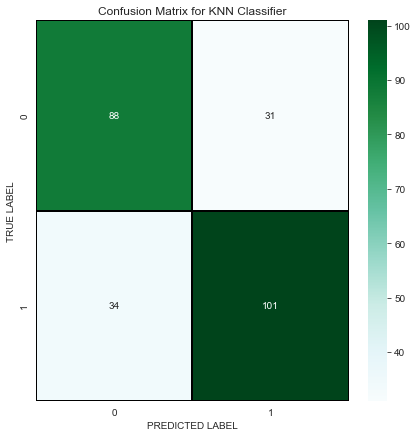

In [75]:
cm = confusion_matrix(Y_test,predKNN)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [76]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

# [Prediction]
predXGB = XGB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predXGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predXGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predXGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predXGB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predXGB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predXGB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predXGB))

R2 Score: 0.28851540616246485
Mean Absolute Error 0.17716535433070865
Mean Squared Error 0.17716535433070865
Root Mean Squared Error 0.4209101499497353
-----------------------------------------------------
Accuracy Score:  0.8228346456692913
-----------------------------------------------------
Confusion Matrix:
 [[ 96  23]
 [ 22 113]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       119
           1       0.83      0.84      0.83       135

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



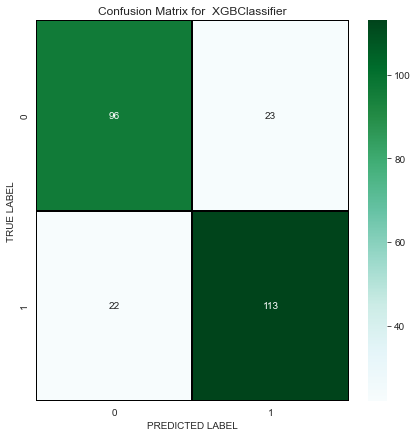

In [77]:
cm = confusion_matrix(Y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### Support Vector Machine classifier

In [78]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.11459694989106739
Mean Absolute Error 0.2204724409448819
Mean Squared Error 0.2204724409448819
Root Mean Squared Error 0.46954492963387634
-----------------------------------------------------
Accuracy Score:  0.7795275590551181
-----------------------------------------------------
Confusion Matrix:
 [[ 71  48]
 [  8 127]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       119
           1       0.73      0.94      0.82       135

    accuracy                           0.78       254
   macro avg       0.81      0.77      0.77       254
weighted avg       0.81      0.78      0.77       254



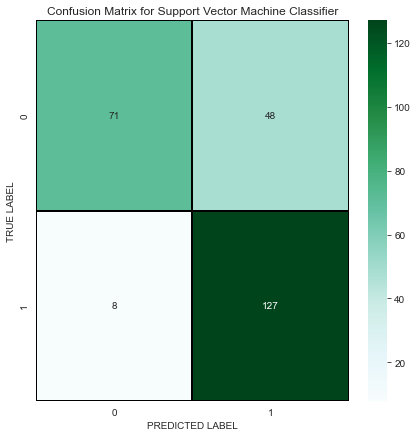

In [79]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Cross Validation Score

In [80]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(XGB,X,Y,cv=5).mean())

Logistic Regression 0.6848408002254155
Decision Tree Classifier 0.7512256973795435
Random Forest Classifier 0.7797055508593971
KNeighbors Classifier 0.734636517328825
Support Vector  Classifier 0.7073964497041421
Gradient Boosting Classifier 0.7939067342913496


### Hyper Parameter Tuning

In [81]:
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [82]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [83]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [84]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [85]:
loan = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
loan.fit(X_train, Y_train)
pred = loan.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 85.43307086614173


### Plotting ROC and compare AUC for the final model

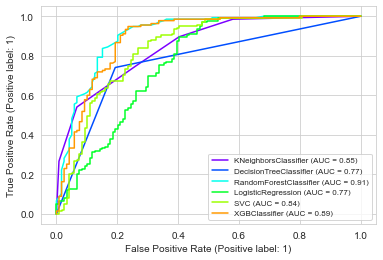

In [86]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(KNN,X_test,Y_test)
plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)     
plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(LOR, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

### Saving The Model

In [87]:
import joblib
joblib.dump(loan,"Loan Prediction Project.pkl")

['Loan Prediction Project.pkl']